In [434]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression, LassoCV
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score, auc, roc_auc_score
from sklearn.model_selection import cross_val_score

import scikitplot as skplt

In [432]:
##pip install pandas-profiling

In [509]:
import warnings
warnings.filterwarnings('ignore')

In [273]:
plt.rcParams["figure.figsize"] = (12,5)

In [274]:
trainds = pd.read_csv(r'C:\Users\mailk\OneDrive\Desktop\AI and ML\Linear Regression\Employee Attrition\Dataset\Train.csv')

In [275]:
testds = pd.read_csv(r'C:\Users\mailk\OneDrive\Desktop\AI and ML\Linear Regression\Employee Attrition\Dataset\Test.csv')

In [276]:
subds = pd.read_csv(r'C:\Users\mailk\OneDrive\Desktop\AI and ML\Linear Regression\Employee Attrition\Dataset\sample_submission.csv')

In [523]:
prof = pp.ProfileReport(trainds)

In [525]:
prof.to_file(r'C:\Users\mailk\OneDrive\Desktop\AI and ML\Linear Regression\Employee Attrition\pandas_profile.xls')

In [277]:
trainds.head(5)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [278]:
testds.head(5)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,...,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,...,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,...,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,...,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,...,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [279]:
trainds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [280]:
subds.head(10)

,Employee_ID,Attrition_rate
0,TID_1,0.1588
1,TID_2,0.1424
2,TID_3,0.4758
3,TID_4,0.0846
4,TID_5,0.2388


In [281]:
testds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                3000 non-null   object 
 1   Gender                     3000 non-null   object 
 2   Age                        2839 non-null   float64
 3   Education_Level            3000 non-null   int64  
 4   Relationship_Status        3000 non-null   object 
 5   Hometown                   3000 non-null   object 
 6   Unit                       3000 non-null   object 
 7   Decision_skill_possess     3000 non-null   object 
 8   Time_of_service            2948 non-null   float64
 9   Time_since_promotion       3000 non-null   int64  
 10  growth_rate                3000 non-null   int64  
 11  Travel_Rate                3000 non-null   int64  
 12  Post_Level                 3000 non-null   int64  
 13  Pay_Scale                  2997 non-null   float

In [282]:
testds['Attrition_rate'] = np.nan

In [283]:
data = pd.concat([trainds, testds])

In [284]:
data.shape

(10000, 24)

In [285]:
data.duplicated().sum()

0

In [286]:
data.isna().sum()

Employee_ID                     0
Gender                          0
Age                           573
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service               196
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                      12
Compensation_and_Benefits       0
Work_Life_balance              16
VAR1                            0
VAR2                          794
VAR3                            0
VAR4                          954
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
dtype: int64

#### Lets look at the data spread

In [287]:
data.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [446]:
plt.rcParams["figure.figsize"] = (5,3)

<AxesSubplot:>

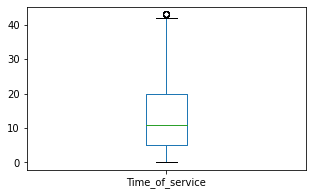

In [447]:
data['Time_of_service'].plot(kind='box')

<AxesSubplot:>

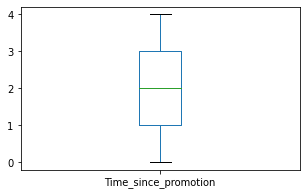

In [448]:
data['Time_since_promotion'].plot(kind='box')

In [288]:
for i in ['Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance']:
    print("Value counts for", i, data[i].value_counts())
    

Value counts for Gender F    5842
M    4158
Name: Gender, dtype: int64
Value counts for Age 22.0    347
27.0    336
25.0    320
26.0    305
54.0    304
37.0    302
60.0    300
52.0    299
35.0    288
30.0    286
31.0    283
42.0    277
28.0    277
45.0    274
47.0    270
32.0    270
24.0    264
21.0    242
65.0    213
19.0    213
23.0    208
59.0    194
20.0    176
58.0    170
50.0    156
29.0    154
33.0    145
51.0    142
41.0    141
34.0    140
56.0    140
36.0    138
43.0    137
49.0    137
57.0    136
38.0    135
55.0    135
53.0    133
46.0    132
64.0    125
44.0    123
40.0    123
48.0    122
39.0    120
63.0    103
62.0    101
61.0     91
Name: Age, dtype: int64
Value counts for Education_Level 3    4063
4    3018
2     982
1     979
5     958
Name: Education_Level, dtype: int64
Value counts for Relationship_Status Married    6461
Single     3539
Name: Relationship_Status, dtype: int64
Value counts for Hometown Lebanon        2953
Springfield    2484
Franklin       2181
Washin

<AxesSubplot:>

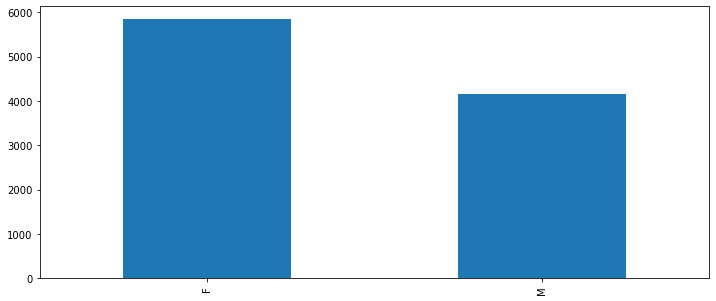

In [289]:
data['Gender'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

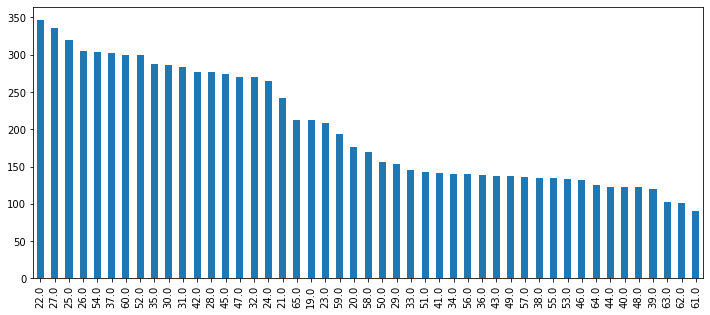

In [290]:
data['Age'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

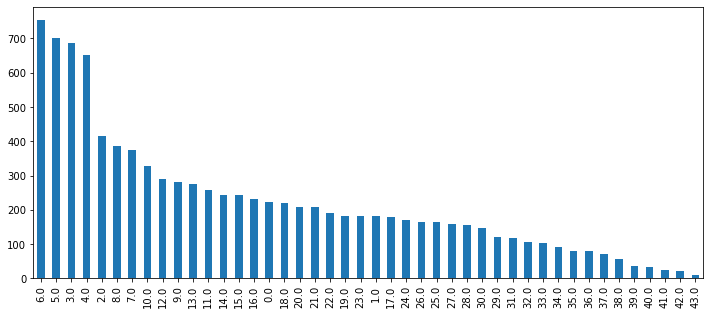

In [291]:
data['Time_of_service'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

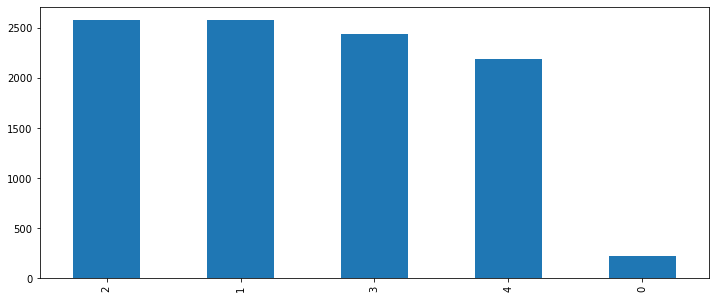

In [292]:
data['Time_since_promotion'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

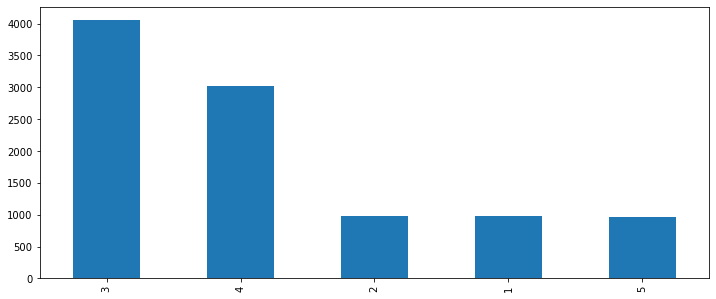

In [293]:
data['Education_Level'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

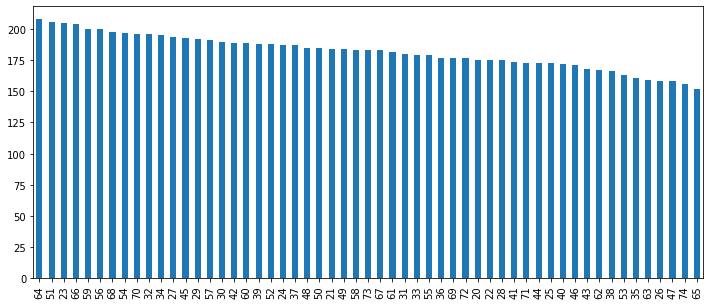

In [294]:
data['growth_rate'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

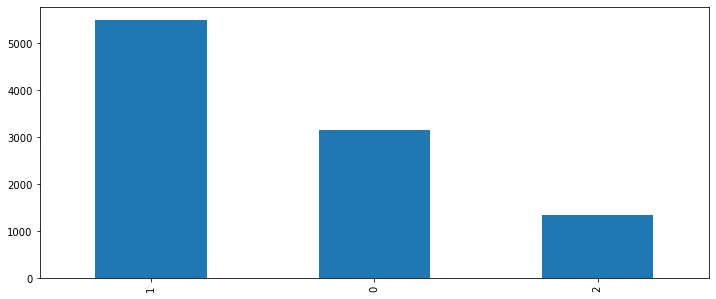

In [295]:
data['Travel_Rate'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

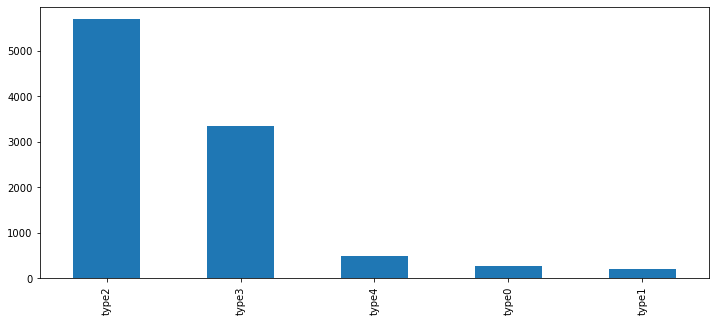

In [296]:
data['Compensation_and_Benefits'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

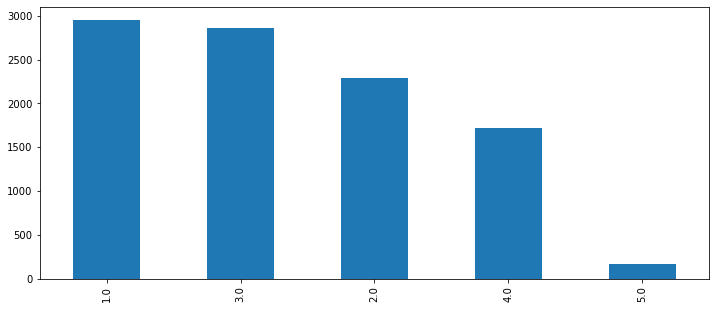

In [297]:
data['Work_Life_balance'].value_counts().plot(kind = 'bar')

In [453]:
data.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate', 'Time_of_service_log',
       'Time_since_promotion_log'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='Attrition_rate'>

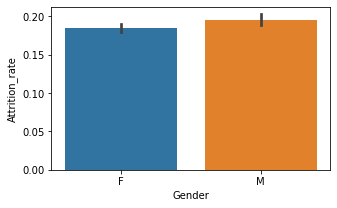

In [454]:
sns.barplot(x=data['Gender'], y=data['Attrition_rate'])

<AxesSubplot:xlabel='Education_Level', ylabel='Attrition_rate'>

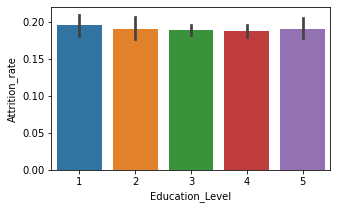

In [455]:
sns.barplot(x=data['Education_Level'], y=data['Attrition_rate'])

In [463]:
plt.rcParams["figure.figsize"] = (20,5)

<AxesSubplot:xlabel='Unit', ylabel='Attrition_rate'>

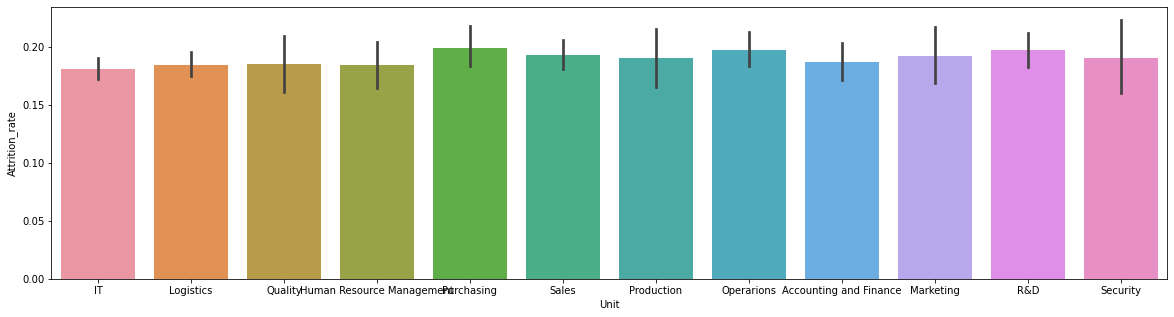

In [464]:
sns.barplot(x=data['Unit'], y=data['Attrition_rate'])

<AxesSubplot:xlabel='Compensation_and_Benefits', ylabel='Attrition_rate'>

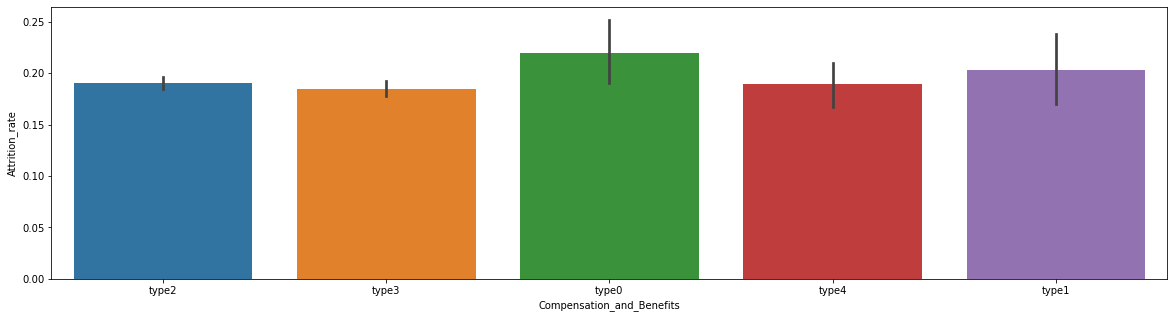

In [469]:
sns.barplot(x=data['Compensation_and_Benefits'], y=data['Attrition_rate'])

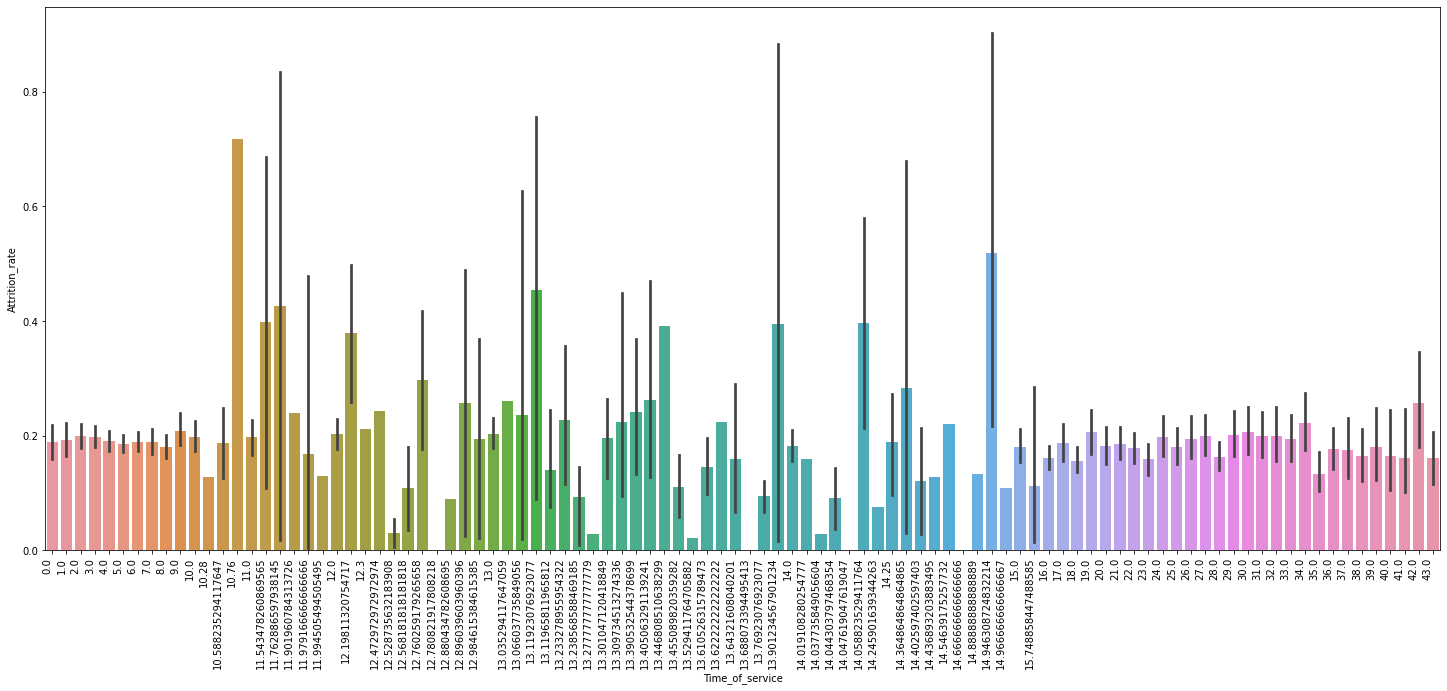

In [482]:
plt.rcParams["figure.figsize"] = (25,10)
chart = sns.barplot(x=data['Time_of_service'], y=data['Attrition_rate'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [298]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9427.0,39.675507,13.574856,19.0000,27.0000,38.00000,52.0000,65.0000
Education_Level,10000.0,3.199400,1.065436,1.0000,3.0000,3.00000,4.0000,5.0000
Time_of_service,9804.0,13.390657,10.311381,0.0000,5.0000,10.00000,21.0000,43.0000
Time_since_promotion,10000.0,2.378600,1.149780,0.0000,1.0000,2.00000,3.0000,4.0000
growth_rate,10000.0,47.008400,15.848553,20.0000,33.0000,47.00000,61.0000,74.0000
Travel_Rate,10000.0,0.820700,0.646524,0.0000,0.0000,1.00000,1.0000,2.0000
Post_Level,10000.0,2.797000,1.171037,1.0000,2.0000,3.00000,4.0000,5.0000
Pay_Scale,9988.0,6.022627,2.070087,1.0000,5.0000,6.00000,8.0000,10.0000
Work_Life_balance,9984.0,2.385817,1.128782,1.0000,1.0000,2.00000,3.0000,5.0000
VAR1,10000.0,3.089100,0.831884,1.0000,3.0000,3.00000,3.0000,5.0000


In [299]:
data[data['Attrition_rate'] > 0.54265]

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
5,EID_2278,M,54.0,3,Married,Lebanon,Purchasing,Conceptual,19.0,1,...,type2,1.0,3,-1.8176,1.8688,2.0,2,8,3,0.7613
19,EID_12947,M,32.0,3,Single,Lebanon,IT,Conceptual,7.0,4,...,type2,1.0,3,NaN,0.7075,1.0,1,5,4,0.6410
25,EID_3901,F,NaN,2,Married,Washington,Marketing,Directive,15.0,1,...,type2,1.0,3,-0.1048,-0.4537,1.0,4,8,2,0.8727
27,EID_12981,M,28.0,3,Single,Lebanon,Sales,Conceptual,NaN,1,...,type2,1.0,3,0.7516,0.7075,2.0,3,8,3,0.6272
38,EID_11141,F,33.0,3,Married,Lebanon,Logistics,Analytical,9.0,3,...,type2,2.0,2,0.7516,-0.4537,NaN,2,7,3,0.6961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6932,EID_17155,M,27.0,3,Married,Franklin,Security,Analytical,5.0,1,...,type2,3.0,3,-0.1048,-0.4537,2.0,2,7,2,0.9735
6946,EID_14849,F,28.0,4,Married,Springfield,Logistics,Conceptual,6.0,2,...,type2,2.0,3,NaN,-0.4537,2.0,3,9,3,0.6935
6966,EID_4159,F,65.0,1,Single,Washington,Marketing,Behavioral,34.0,4,...,type2,1.0,2,-0.9612,0.7075,2.0,3,6,5,0.8574
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,...,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839


In [300]:
data.groupby(['Gender']).Attrition_rate.median()

Gender
F    0.1410
M    0.1454
Name: Attrition_rate, dtype: float64

In [301]:
for i in ['Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance']:
    print("Attrition rate for group", i, data.groupby([i]).Attrition_rate.median())

Attrition rate for group Gender Gender
F    0.1410
M    0.1454
Name: Attrition_rate, dtype: float64
Attrition rate for group Age Age
19.0    0.13530
20.0    0.15790
21.0    0.15000
22.0    0.15380
23.0    0.15190
24.0    0.14410
25.0    0.13070
26.0    0.13325
27.0    0.14900
28.0    0.15890
29.0    0.14410
30.0    0.13380
31.0    0.14575
32.0    0.15620
33.0    0.16145
34.0    0.13930
35.0    0.13710
36.0    0.12975
37.0    0.13900
38.0    0.15430
39.0    0.11980
40.0    0.14360
41.0    0.15350
42.0    0.12000
43.0    0.15940
44.0    0.16110
45.0    0.12625
46.0    0.12520
47.0    0.13280
48.0    0.15120
49.0    0.12810
50.0    0.15140
51.0    0.15760
52.0    0.14540
53.0    0.12495
54.0    0.13950
55.0    0.14380
56.0    0.16170
57.0    0.11130
58.0    0.13290
59.0    0.16400
60.0    0.14750
61.0    0.12600
62.0    0.14020
63.0    0.12370
64.0    0.13390
65.0    0.15100
Name: Attrition_rate, dtype: float64
Attrition rate for group Education_Level Education_Level
1    0.14490
2    0.1

##### Mean attrition seems almost equal if compared against individual features
##### Need to evaluate on multiple features

In [302]:
a = []
for i in ['Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance']:
    for j in ['Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance']:
        print("Attrition for:",i,j,"\n", data.groupby([i, j]).Attrition_rate.median().sort_values(ascending=False).head(15))


Attrition for: Gender Gender 
 Gender  Gender
M       M         0.1454
F       F         0.1410
Name: Attrition_rate, dtype: float64
Attrition for: Gender Age 
 Gender  Age 
M       43.0    0.19070
F       44.0    0.17580
M       62.0    0.17245
        20.0    0.17220
F       63.0    0.17150
M       59.0    0.17120
        56.0    0.17010
F       33.0    0.16895
        28.0    0.16390
M       22.0    0.16180
        48.0    0.16130
F       51.0    0.16105
        52.0    0.15920
        32.0    0.15890
        65.0    0.15790
Name: Attrition_rate, dtype: float64
Attrition for: Gender Education_Level 
 Gender  Education_Level
M       1                  0.15180
F       5                  0.14990
M       4                  0.14625
        3                  0.14480
        5                  0.14160
F       4                  0.14110
        3                  0.13935
        1                  0.13910
M       2                  0.13845
F       2                  0.13350
Name: Attrition

In [303]:
plt.rcParams["figure.figsize"] = (20,10)

<AxesSubplot:>

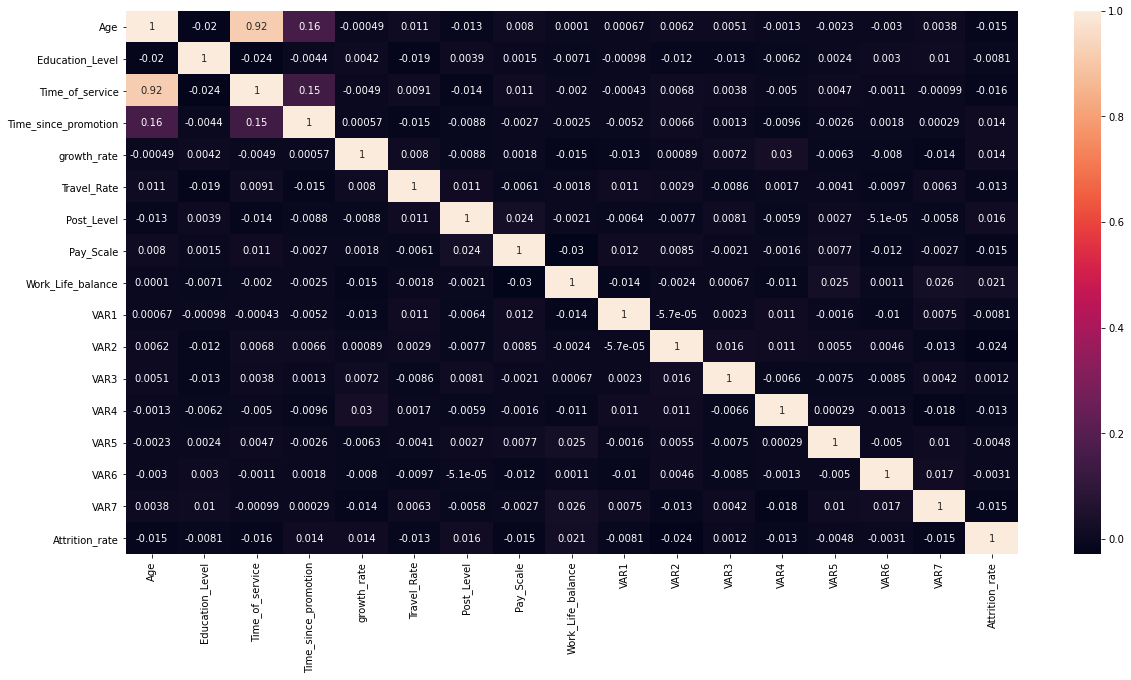

In [304]:
sns.heatmap(data.corr(), annot=True)

In [305]:
data.isna().sum()

Employee_ID                     0
Gender                          0
Age                           573
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service               196
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                      12
Compensation_and_Benefits       0
Work_Life_balance              16
VAR1                            0
VAR2                          794
VAR3                            0
VAR4                          954
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
dtype: int64

In [306]:
data[(data['Age'].isna()) & (data['Time_of_service'].isna())]

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
1679,EID_21919,M,NaN,4,Married,Springfield,Sales,Directive,NaN,2,...,type3,1.0,3,-1.8176,-0.4537,2.0,3,8,3,0.2590
1980,EID_16349,M,NaN,3,Single,Springfield,Sales,Directive,NaN,4,...,type3,4.0,2,0.7516,-0.4537,2.0,4,7,4,0.2922
3264,EID_15023,F,NaN,3,Married,Springfield,IT,Conceptual,NaN,2,...,type3,4.0,3,NaN,-0.4537,2.0,2,6,2,0.1740
5043,EID_15442,F,NaN,3,Married,Washington,R&D,Behavioral,NaN,1,...,type1,1.0,3,-0.1048,0.7075,1.0,3,8,3,0.1437
5569,EID_10715,M,NaN,4,Married,Lebanon,Sales,Directive,NaN,3,...,type3,2.0,3,0.7516,0.7075,2.0,4,8,3,0.1034
5938,EID_14057,F,NaN,4,Single,Franklin,Logistics,Conceptual,NaN,4,...,type2,4.0,4,0.7516,1.8688,2.0,2,8,3,0.1781
6753,EID_3748,F,NaN,3,Married,Lebanon,Logistics,Analytical,NaN,1,...,type2,2.0,3,-1.8176,0.7075,NaN,3,8,3,0.6815
855,EID_21521,M,NaN,1,Single,Franklin,Logistics,Conceptual,NaN,4,...,type2,4.0,3,-1.8176,0.7075,1.0,3,5,3,NaN
998,EID_13717,M,NaN,3,Married,Springfield,IT,Directive,NaN,2,...,type3,2.0,1,0.7516,-1.6150,3.0,4,5,3,NaN


In [307]:
data[['Age', 'Time_of_service', 'growth_rate', 'Post_Level']]

,Age,Time_of_service,growth_rate,Post_Level
0,42.0,4.0,33,1
1,24.0,5.0,36,3
2,58.0,27.0,51,2
3,26.0,4.0,56,3
4,31.0,5.0,62,3
...,...,...,...,...
2995,32.0,3.0,38,3
2996,NaN,10.0,57,4
2997,60.0,35.0,69,2
2998,51.0,23.0,30,2


In [308]:
data[data['Time_of_service'].isna()].head(50)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
27,EID_12981,M,28.0,3,Single,Lebanon,Sales,Conceptual,NaN,1,...,type2,1.0,3,0.7516,0.7075,2.0,3,8,3,0.6272
57,EID_15391,M,24.0,4,Married,Springfield,Quality,Behavioral,NaN,4,...,type2,2.0,4,-1.8176,-0.4537,2.0,3,8,5,0.2197
96,EID_23317,M,22.0,5,Married,Franklin,Production,Conceptual,NaN,1,...,type3,1.0,1,1.6081,-0.4537,NaN,2,5,5,0.0350
104,EID_14719,F,25.0,1,Married,Lebanon,Quality,Directive,NaN,4,...,type3,2.0,3,0.7516,-0.4537,2.0,2,8,5,0.2396
197,EID_8070,M,40.0,3,Married,Springfield,Logistics,Directive,NaN,1,...,type2,1.0,3,-0.9612,-0.4537,2.0,5,7,3,0.0543
253,EID_13198,F,37.0,5,Married,Washington,Purchasing,Behavioral,NaN,3,...,type3,1.0,3,-0.1048,-0.4537,2.0,3,7,4,0.0335
408,EID_14005,F,26.0,2,Single,Washington,IT,Conceptual,NaN,3,...,type3,1.0,3,-0.1048,-0.4537,1.0,3,8,3,0.1458
473,EID_15376,F,24.0,3,Married,Washington,Logistics,Analytical,NaN,2,...,type4,1.0,3,0.7516,-0.4537,1.0,2,7,3,0.1247
515,EID_11585,M,32.0,1,Married,Springfield,R&D,Conceptual,NaN,4,...,type2,1.0,3,-0.1048,-0.4537,2.0,3,6,4,0.0749
615,EID_1237,F,58.0,3,Married,Clinton,Logistics,Conceptual,NaN,1,...,type2,4.0,3,-0.9612,0.7075,2.0,4,8,3,0.0518


In [309]:
data.groupby(['Post_Level',  'Time_of_service']).Age.median().head(5)

Post_Level  Time_of_service
1           0.0                19.0
            1.0                20.0
            2.0                21.0
            3.0                22.0
            4.0                27.0
Name: Age, dtype: float64

In [310]:
data.groupby(['Unit', 'Post_Level']).Time_of_service.mean()

Unit                       Post_Level
Accounting and Finance     1             12.198113
                           2             13.035294
                           3             12.472973
                           4             15.520000
                           5             10.760000
Human Resource Management  1             11.762887
                           2             13.688073
                           3             12.528736
                           4             14.666667
                           5             11.543478
IT                         1             13.610526
                           2             13.238569
                           3             13.390533
                           4             13.119231
                           5             12.896040
Logistics                  1             15.748858
                           2             13.301047
                           3             13.233279
                           4             13.

In [311]:
data['Time_of_service'].head(50)

0      4.0
1      5.0
2     27.0
3      4.0
4      5.0
5     19.0
6      2.0
7     34.0
8     13.0
9     21.0
10    31.0
11     0.0
12    27.0
13     4.0
14     0.0
15     0.0
16    35.0
17    12.0
18     9.0
19     7.0
20     3.0
21     6.0
22    33.0
23     6.0
24     5.0
25    15.0
26    21.0
27     NaN
28    15.0
29     6.0
30     5.0
31    28.0
32    30.0
33    33.0
34     0.0
35    10.0
36     6.0
37    26.0
38     9.0
39     7.0
40     4.0
41    12.0
42     6.0
43    19.0
44     5.0
45    14.0
46     3.0
47    10.0
48    35.0
49     4.0
Name: Time_of_service, dtype: float64

In [312]:
data["Time_of_service"] = data.groupby(["Unit", 'Post_Level']).Time_of_service.transform(lambda x: x.fillna(x.mean()))

In [313]:
data['Time_of_service'].isna().sum()

0

In [314]:
data[["Unit", 'Post_Level', 'Time_of_service', 'Age']].head(60)

,Unit,Post_Level,Time_of_service,Age
0,IT,1,4.000000,42.0
1,Logistics,3,5.000000,24.0
2,Quality,2,27.000000,58.0
3,Human Resource Management,3,4.000000,26.0
4,Logistics,3,5.000000,31.0
5,Purchasing,5,19.000000,54.0
6,Purchasing,1,2.000000,21.0
7,Sales,4,34.000000,NaN
8,Production,1,13.000000,40.0
9,IT,2,21.000000,45.0


In [315]:
data[data['Age'].isna()].head(60)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
7,EID_1235,F,NaN,3,Married,Springfield,Sales,Directive,34.0,4,...,type3,2.0,3,-0.1048,-0.4537,2.0,3,9,3,0.1169
15,EID_20121,F,NaN,3,Married,Springfield,Logistics,Analytical,0.0,0,...,type2,2.0,3,0.7516,-1.6150,1.0,3,8,3,0.1331
25,EID_3901,F,NaN,2,Married,Washington,Marketing,Directive,15.0,1,...,type2,1.0,3,-0.1048,-0.4537,1.0,4,8,2,0.8727
40,EID_17527,F,NaN,2,Married,Springfield,IT,Conceptual,4.0,1,...,type3,2.0,3,-1.8176,0.7075,2.0,5,6,2,0.0618
43,EID_1433,M,NaN,3,Married,Springfield,Logistics,Conceptual,19.0,3,...,type2,2.0,5,0.7516,1.8688,2.0,3,8,3,0.1571
54,EID_1297,M,NaN,4,Married,Springfield,IT,Directive,24.0,4,...,type3,3.0,3,-1.8176,-0.4537,1.0,3,9,4,0.0449
97,EID_22742,F,NaN,4,Married,Lebanon,Human Resource Management,Analytical,19.0,4,...,type2,4.0,4,-1.8176,-0.4537,3.0,2,5,3,0.0163
101,EID_13859,M,NaN,4,Married,Lebanon,Operarions,Behavioral,3.0,2,...,type2,2.0,4,0.7516,0.7075,3.0,3,5,3,0.1309
116,EID_17036,M,NaN,2,Married,Franklin,Operarions,Directive,5.0,3,...,type4,1.0,3,-0.1048,0.7075,NaN,4,6,3,0.2365
144,EID_25188,F,NaN,3,Single,Springfield,R&D,Analytical,18.0,4,...,type2,1.0,4,-0.9612,-0.4537,2.0,2,7,2,0.0211


In [316]:
data.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [317]:
data.groupby(["Time_of_service", 'Gender', 'Unit', 'Post_Level']).Age.transform(lambda x: x.fillna(x.mean()))

0       42.0
1       24.0
2       58.0
3       26.0
4       31.0
        ... 
2995    32.0
2996     NaN
2997    60.0
2998    51.0
2999    45.0
Name: Age, Length: 10000, dtype: float64

In [318]:
data.groupby(['Gender', 'Unit', 'Post_Level', "Time_of_service"]).Age.mean().head(50)

Gender  Unit                    Post_Level  Time_of_service
F       Accounting and Finance  1           1.000000           20.000000
                                            2.000000           24.750000
                                            3.000000           22.000000
                                            4.000000           29.000000
                                            5.000000           29.666667
                                            6.000000           27.500000
                                            7.000000           33.500000
                                            8.000000           36.000000
                                            9.000000           38.000000
                                            10.000000          37.000000
                                            11.000000          49.000000
                                            12.000000          41.333333
                                            12.198113          3

In [319]:
with pd.option_context('display.max_rows', 1000, 'display.max_columns', None):
    data.head()

In [320]:
data['Age'] = data.groupby(["Time_of_service", 'Gender', 'Unit', 'Post_Level']).Age.transform(lambda x: x.fillna(x.median()))

In [321]:
data[["Time_of_service", 'Gender', 'Unit', 'Post_Level', 'Age']][data['Age'].isna()]

,Time_of_service,Gender,Unit,Post_Level,Age
97,19.0,F,Human Resource Management,3,NaN
449,10.0,M,Marketing,1,NaN
452,33.0,M,Accounting and Finance,1,NaN
455,11.0,M,Security,4,NaN
535,27.0,M,Quality,3,NaN
...,...,...,...,...,...
2731,32.0,F,Marketing,2,NaN
2765,9.0,M,Accounting and Finance,5,NaN
2817,19.0,M,IT,5,NaN
2932,13.0,M,Quality,3,NaN


In [322]:
data[data['Age'].isna()]

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
97,EID_22742,F,NaN,4,Married,Lebanon,Human Resource Management,Analytical,19.0,4,...,type2,4.0,4,-1.8176,-0.4537,3.0,2,5,3,0.0163
449,EID_10045,M,NaN,3,Married,Franklin,Marketing,Behavioral,10.0,3,...,type2,3.0,2,-0.9612,0.7075,1.0,2,7,4,0.0312
452,EID_3788,M,NaN,1,Single,Franklin,Accounting and Finance,Conceptual,33.0,2,...,type2,2.0,3,1.6081,0.7075,2.0,3,8,3,0.1896
455,EID_12546,M,NaN,1,Married,Springfield,Security,Analytical,11.0,4,...,type3,1.0,3,-0.1048,-1.6150,2.0,2,8,3,0.0318
535,EID_8684,M,NaN,4,Single,Clinton,Quality,Behavioral,27.0,1,...,type3,1.0,3,-1.8176,0.7075,1.0,2,5,3,0.0739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,EID_1919,F,NaN,4,Married,Franklin,Marketing,Directive,32.0,2,...,type2,4.0,3,-0.1048,-0.4537,2.0,4,7,4,NaN
2765,EID_10753,M,NaN,4,Married,Lebanon,Accounting and Finance,Directive,9.0,4,...,type3,3.0,3,-0.1048,-0.4537,NaN,1,7,3,NaN
2817,EID_1719,M,NaN,3,Single,Lebanon,IT,Analytical,19.0,1,...,type2,4.0,2,0.7516,-0.4537,2.0,4,7,3,NaN
2932,EID_23044,M,NaN,4,Married,Washington,Quality,Conceptual,13.0,4,...,type3,1.0,3,-0.9612,0.7075,NaN,3,8,1,NaN


In [323]:
data[(data['Time_of_service'] ==19.0) & (data['Gender'] == 'F') & (data['Unit'] == 'Human Resource Management') & (data['Post_Level'] == 3)]

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
97,EID_22742,F,NaN,4,Married,Lebanon,Human Resource Management,Analytical,19.0,4,...,type2,4.0,4,-1.8176,-0.4537,3.0,2,5,3,0.0163


In [324]:
data['Age'] = data.groupby(["Time_of_service", 'Gender', 'Unit']).Age.transform(lambda x: x.fillna(x.median()))

In [325]:
data[data['Age'].isna()]

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
455,EID_12546,M,NaN,1,Married,Springfield,Security,Analytical,11.0,4,...,type3,1.0,3,-0.1048,-1.6150,2.0,2,8,3,0.0318
706,EID_7047,M,NaN,3,Married,Springfield,Quality,Directive,21.0,1,...,type2,3.0,3,-0.9612,-0.4537,1.0,2,5,3,0.1998
1277,EID_4147,M,NaN,1,Single,Lebanon,Production,Behavioral,39.0,2,...,type3,2.0,3,0.7516,-0.4537,2.0,3,5,3,0.0740
3085,EID_5647,M,NaN,3,Single,Springfield,Marketing,Behavioral,32.0,1,...,type3,1.0,3,-1.8176,-0.4537,2.0,1,8,1,0.2971
4146,EID_1374,F,NaN,4,Married,Springfield,Logistics,Behavioral,39.0,4,...,type4,2.0,3,-0.1048,-0.4537,2.0,3,6,3,0.1882
4453,EID_4860,F,NaN,4,Married,Springfield,Production,Analytical,37.0,2,...,type2,2.0,3,NaN,-1.6150,2.0,3,8,4,0.1614
4697,EID_4590,M,NaN,4,Married,Franklin,Human Resource Management,Analytical,36.0,2,...,type3,3.0,3,0.7516,0.7075,2.0,3,5,4,0.2772
5001,EID_18970,M,NaN,4,Married,Clinton,Quality,Analytical,1.0,1,...,type2,3.0,3,-0.9612,-1.6150,2.0,3,7,4,0.5652
5053,EID_6260,F,NaN,4,Married,Franklin,Purchasing,Analytical,41.0,1,...,type2,3.0,3,-0.1048,-0.4537,2.0,3,8,1,0.0274
302,EID_22832,M,NaN,4,Married,Springfield,Quality,Conceptual,30.0,1,...,type3,1.0,1,-0.9612,0.7075,NaN,4,8,4,NaN


In [326]:
data['Age'] = data.groupby(["Time_of_service", 'Gender']).Age.transform(lambda x: x.fillna(x.median()))

In [327]:
data.isna().sum()

Employee_ID                     0
Gender                          0
Age                             0
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service                 0
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                      12
Compensation_and_Benefits       0
Work_Life_balance              16
VAR1                            0
VAR2                          794
VAR3                            0
VAR4                          954
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
dtype: int64

In [328]:
from scipy.stats import mode
data.pivot_table(values="Pay_Scale", index = "Post_Level", aggfunc=(lambda x: mode(x).mode[0]))

,Pay_Scale
Post_Level,
1,8.0
2,8.0
3,8.0
4,8.0
5,8.0


In [329]:
data[data['Pay_Scale'].isna()]

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
445,EID_4641,M,52.0,3,Married,Clinton,Logistics,Behavioral,15.0,2,...,type3,1.0,3,0.7516,-0.4537,3.0,1,7,1,0.1803
1126,EID_16660,M,28.0,3,Married,Lebanon,Logistics,Directive,5.0,1,...,type2,3.0,1,0.7516,-1.6150,1.0,3,8,3,0.1154
1378,EID_19310,F,21.0,4,Single,Franklin,Sales,Directive,2.0,2,...,type2,NaN,2,NaN,-0.4537,2.0,3,7,4,0.0617
1997,EID_24076,M,35.0,3,Married,Springfield,Logistics,Directive,12.0,1,...,type2,3.0,3,-1.8176,0.7075,2.0,2,7,4,0.1047
3083,EID_16076,M,23.0,5,Married,Lebanon,Operarions,Analytical,4.0,1,...,type3,3.0,3,-0.9612,0.7075,2.0,3,8,4,0.1841
3777,EID_13589,M,36.0,4,Married,Franklin,IT,Directive,9.0,1,...,type2,3.0,3,0.7516,-1.6150,2.0,4,7,3,0.8597
4508,EID_11400,M,33.0,3,Married,Washington,Operarions,Directive,5.0,1,...,type2,2.0,2,-0.1048,-0.4537,1.0,3,8,5,0.0838
5958,EID_6740,F,52.0,3,Married,Clinton,Logistics,Conceptual,16.0,2,...,type3,4.0,3,0.7516,1.8688,2.0,2,8,2,0.1900
6857,EID_24697,M,47.0,1,Single,Franklin,Sales,Directive,23.0,1,...,type2,1.0,3,-0.1048,0.7075,2.0,2,8,3,0.1509
1202,EID_17521,M,24.0,2,Married,Lebanon,Purchasing,Conceptual,5.0,2,...,type3,3.0,3,-0.9612,-0.4537,2.0,4,6,3,NaN


In [330]:
data['Pay_Scale'] = data['Pay_Scale'].fillna(8.0)

In [331]:
data[data['Work_Life_balance'].isna()]

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
728,EID_12062,M,35.0,3,Single,Washington,Logistics,Behavioral,13.233279,3,...,type2,NaN,3,0.7516,0.7075,2.0,2,9,4,0.0856
902,EID_11146,F,37.0,1,Married,Lebanon,IT,Analytical,10.000000,1,...,type3,NaN,3,1.6081,0.7075,1.0,2,8,3,0.1206
1252,EID_20549,M,42.0,3,Single,Springfield,Purchasing,Directive,12.000000,2,...,type3,NaN,3,0.7516,0.7075,NaN,2,6,3,0.0476
1378,EID_19310,F,21.0,4,Single,Franklin,Sales,Directive,2.000000,2,...,type2,NaN,2,NaN,-0.4537,2.0,3,7,4,0.0617
1634,EID_6814,F,43.0,5,Single,Springfield,Purchasing,Conceptual,14.000000,2,...,type2,NaN,3,NaN,0.7075,2.0,4,6,5,0.0709
2101,EID_25336,M,52.0,4,Single,Franklin,Logistics,Behavioral,25.000000,1,...,type2,NaN,3,0.7516,-0.4537,2.0,4,7,5,0.2981
2971,EID_4230,F,64.0,2,Married,Springfield,IT,Behavioral,40.000000,4,...,type2,NaN,3,1.6081,0.7075,2.0,4,7,5,0.1322
3954,EID_23012,F,37.0,4,Single,Springfield,Purchasing,Conceptual,10.000000,2,...,type3,NaN,3,1.6081,-0.4537,3.0,3,6,3,0.1744
4532,EID_19982,F,30.0,4,Single,Lebanon,Production,Behavioral,8.000000,4,...,type2,NaN,4,-1.8176,-1.6150,2.0,4,6,3,0.5131
4735,EID_12687,F,29.0,1,Married,Washington,Purchasing,Behavioral,6.000000,4,...,type0,NaN,3,-0.9612,0.7075,3.0,4,8,3,0.1517


In [332]:
data['Work_Life_balance'].value_counts()

1.0    2951
3.0    2858
2.0    2287
4.0    1719
5.0     169
Name: Work_Life_balance, dtype: int64

In [333]:
data.groupby(["Relationship_Status", 'Gender']).Work_Life_balance.median()

Relationship_Status  Gender
Married              F         2.0
                     M         2.0
Single               F         2.0
                     M         2.0
Name: Work_Life_balance, dtype: float64

In [334]:
data.pivot_table(values="Work_Life_balance", index = "Unit", columns='Gender', aggfunc=(lambda x: mode(x).mode[0]))

Gender,F,M
Unit,,
Accounting and Finance,3.0,3.0
Human Resource Management,1.0,3.0
IT,3.0,1.0
Logistics,3.0,1.0
Marketing,1.0,1.0
Operarions,3.0,1.0
Production,3.0,1.0
Purchasing,1.0,3.0
Quality,1.0,3.0


In [335]:
data['Work_Life_balance'] = data['Work_Life_balance'].fillna(2.0)

In [336]:
data.isna().sum()

Employee_ID                     0
Gender                          0
Age                             0
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service                 0
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                       0
Compensation_and_Benefits       0
Work_Life_balance               0
VAR1                            0
VAR2                          794
VAR3                            0
VAR4                          954
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
dtype: int64

In [337]:
data1 = data.copy()

In [338]:
##data1.drop(columns=['VAR2', 'VAR4'], inplace=True)

In [339]:
data1.replace({'F':1, 'M':0}, inplace=True)

In [340]:
data1.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,1,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,0,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,1,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,1,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,1,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [341]:
data1.reset_index(drop='index', inplace=True)

In [342]:
data1['VAR4']=data1['VAR4'].fillna(data1['VAR4'].median())

In [343]:
data1['VAR2']=data1['VAR2'].fillna(data1['VAR2'].median())

<AxesSubplot:>

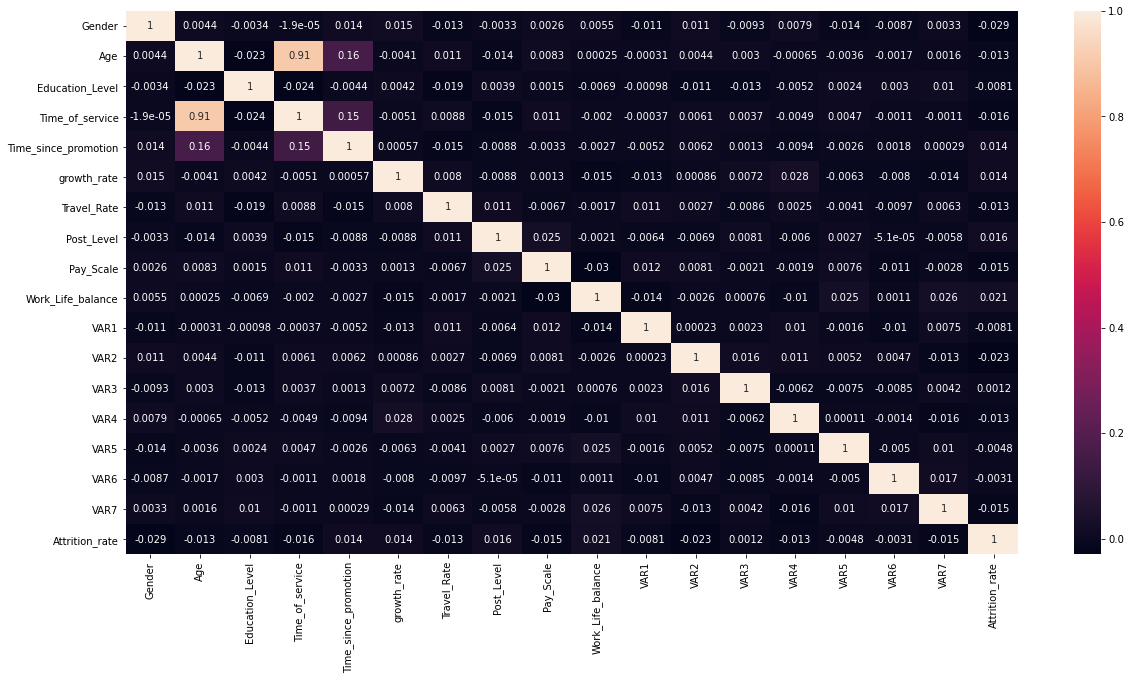

In [344]:
sns.heatmap(data1.corr(), annot=True)

In [345]:
data1.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [351]:
data1["Age_log"] = np.log1p(data1["Age"])

In [352]:
data1["Time_of_service_log"] = np.log1p(data1["Time_of_service"])

In [353]:
data1["Time_since_promotion_log"] = np.log1p(data1["Time_since_promotion"])

<AxesSubplot:>

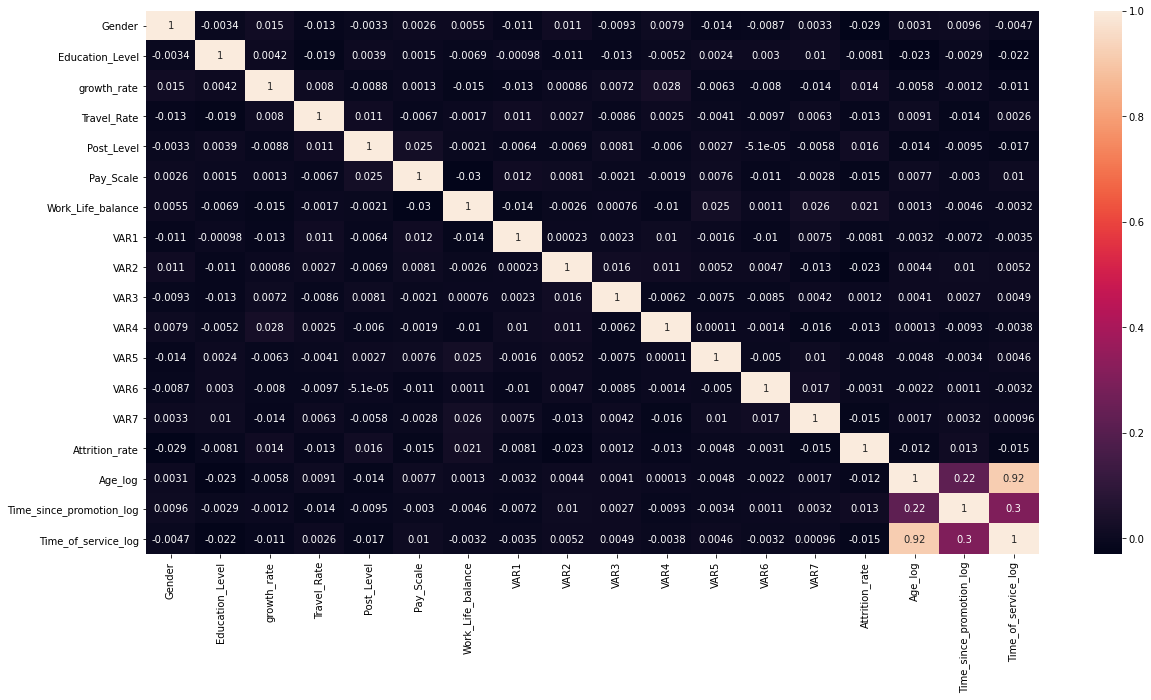

In [357]:
sns.heatmap(data1.drop(columns=['Age', 'Time_since_promotion', 'Time_of_service']).corr(), annot=True)

In [358]:
data2 = data1.copy()

In [359]:
data1.drop(columns=['Age', 'Time_since_promotion', 'Time_of_service'],inplace=True)

In [360]:
num_cols = data1.select_dtypes(include = np.number).columns

In [361]:
num_cols

Index(['Gender', 'Education_Level', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4',
       'VAR5', 'VAR6', 'VAR7', 'Attrition_rate', 'Age_log',
       'Time_since_promotion_log', 'Time_of_service_log'],
      dtype='object')

In [362]:
cat_cols = data1.select_dtypes(exclude = np.number).columns

In [363]:
cat_cols

Index(['Employee_ID', 'Relationship_Status', 'Hometown', 'Unit',
       'Decision_skill_possess', 'Compensation_and_Benefits'],
      dtype='object')

In [364]:
scaler = StandardScaler()

In [365]:
num_pp = pd.DataFrame(scaler.fit_transform(data1[num_cols].drop(columns=['Attrition_rate'])),columns=num_cols.drop(['Attrition_rate']))

In [366]:
cat_pp = pd.get_dummies(data1[cat_cols].drop(columns=['Employee_ID']))

In [367]:
data_prep = pd.concat([data1['Employee_ID'],num_pp, cat_pp,data1['Attrition_rate']], axis=1)

In [368]:
data_prep

,Employee_ID,Gender,Education_Level,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,...,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,Attrition_rate
0,EID_23371,0.843648,0.751467,-0.883936,0.277343,-1.534614,0.471043,0.545070,1.095040,0.794749,...,0,0,1,0,0,0,1,0,0,0.1841
1,EID_18000,-1.185328,-0.187163,-0.694634,-1.269467,0.173359,-0.012078,1.431652,-0.107112,-1.002326,...,1,0,0,0,0,0,1,0,0,0.0670
2,EID_3891,0.843648,-0.187163,0.251872,-1.269467,-0.680627,0.954165,-1.228093,1.095040,-1.002326,...,0,0,1,0,0,0,1,0,0,0.0851
3,EID_17492,0.843648,-0.187163,0.567374,0.277343,0.173359,0.954165,-1.228093,-0.107112,-1.900863,...,0,1,0,0,0,0,1,0,0,0.0668
4,EID_22534,0.843648,-2.064423,0.945976,0.277343,0.173359,-1.944564,0.545070,-2.511414,0.794749,...,0,0,1,0,0,0,0,1,0,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,EID_22547,0.843648,-0.187163,-0.568434,0.277343,0.173359,-0.012078,-0.341511,-2.511414,-0.103788,...,0,0,0,1,0,0,1,0,0,NaN
9996,EID_10066,0.843648,-1.125793,0.630474,0.277343,1.027346,1.437286,-1.228093,-0.107112,0.794749,...,0,0,1,0,0,0,1,0,0,NaN
9997,EID_7126,0.843648,0.751467,1.387679,-1.269467,-0.680627,1.437286,0.545070,-0.107112,-1.900863,...,1,0,0,0,0,0,0,1,0,NaN
9998,EID_4929,0.843648,-2.064423,-1.073237,-1.269467,-0.680627,-0.012078,-1.228093,2.297191,0.794749,...,0,1,0,0,0,0,0,1,0,NaN


In [369]:
train_pp = data_prep[data_prep['Attrition_rate'].notna()]

In [370]:
train_pp.shape

(7000, 47)

In [371]:
test_pp = data_prep[data_prep['Attrition_rate'].isna()]

In [372]:
test_pp.shape

(3000, 47)

## Lets Build Models

In [373]:
X_train = train_pp.drop(columns=['Employee_ID', 'Attrition_rate'])

In [374]:
y_train = train_pp['Attrition_rate']

In [375]:
X_test = test_pp.drop(columns=['Employee_ID', 'Attrition_rate'])

In [378]:
sample = test_pp[['Employee_ID', 'Attrition_rate']]

In [488]:
y_train

0       0.1841
1       0.0670
2       0.0851
3       0.0668
4       0.1827
         ...  
6995    0.7839
6996    0.1055
6997    0.7847
6998    0.4162
6999    0.0910
Name: Attrition_rate, Length: 7000, dtype: float64

In [498]:
lin_model = LinearRegression()

In [527]:
lin_model.fit(X_train, y_train)

LinearRegression()

In [528]:
lin_model.coef_

array([-5.66523478e-03, -1.41615141e-03,  2.46165069e-03, -2.54981474e-03,
        3.36712475e-03, -2.70705921e-03,  3.88706341e-03, -1.17587639e-03,
       -4.13247266e-03,  2.30431581e-04, -2.61440377e-03, -9.31086940e-04,
       -4.82176612e-04, -3.01541806e-03,  3.40649326e-03,  4.15972820e-03,
       -7.05430617e-03, -1.05112827e+10, -1.05112827e+10, -3.67558628e+10,
       -3.67558628e+10, -3.67558628e+10, -3.67558628e+10, -3.67558628e+10,
        2.26936224e+10,  2.26936224e+10,  2.26936224e+10,  2.26936224e+10,
        2.26936224e+10,  2.26936224e+10,  2.26936224e+10,  2.26936224e+10,
        2.26936224e+10,  2.26936224e+10,  2.26936224e+10,  2.26936224e+10,
        4.08524751e+10,  4.08524751e+10,  4.08524751e+10,  4.08524751e+10,
        3.29276655e+10,  3.29276655e+10,  3.29276655e+10,  3.29276655e+10,
        3.29276655e+10])

In [529]:
lin_model.intercept_

-49206617622.02287

In [530]:
y_pred = lin_model.predict(X_train)

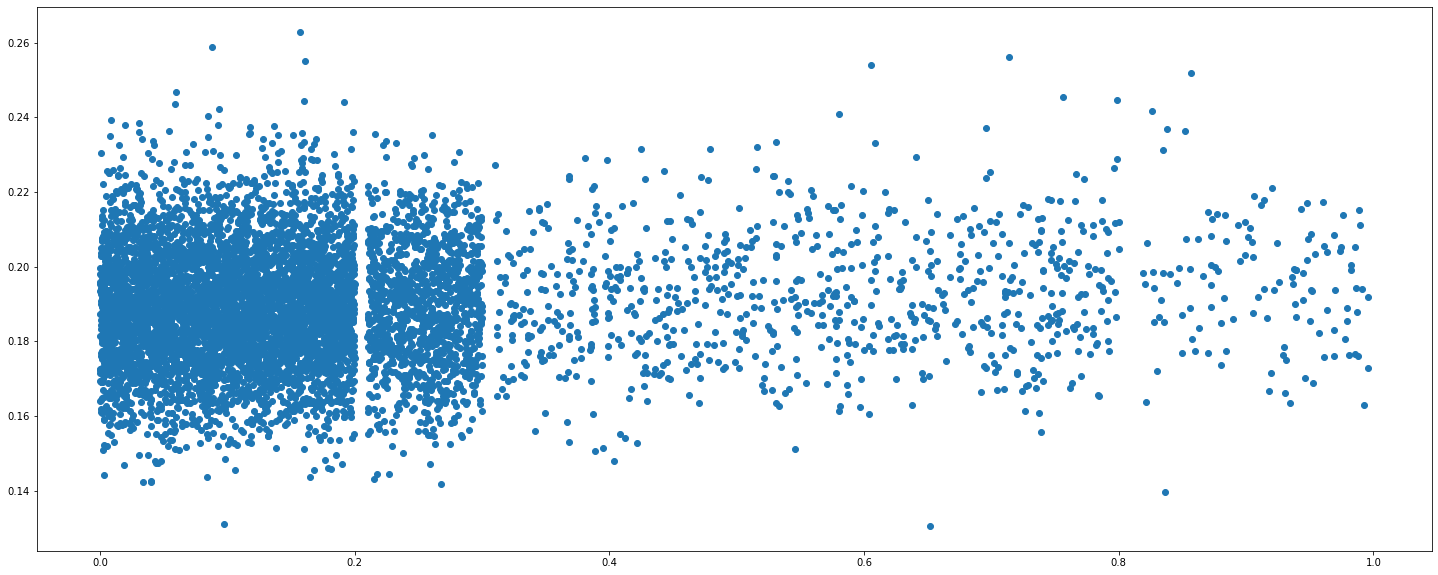

In [531]:
plt.scatter(y_train, y_pred)

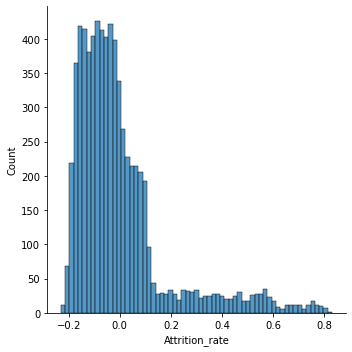

In [533]:
error = y_train-y_pred
sns.displot(error)

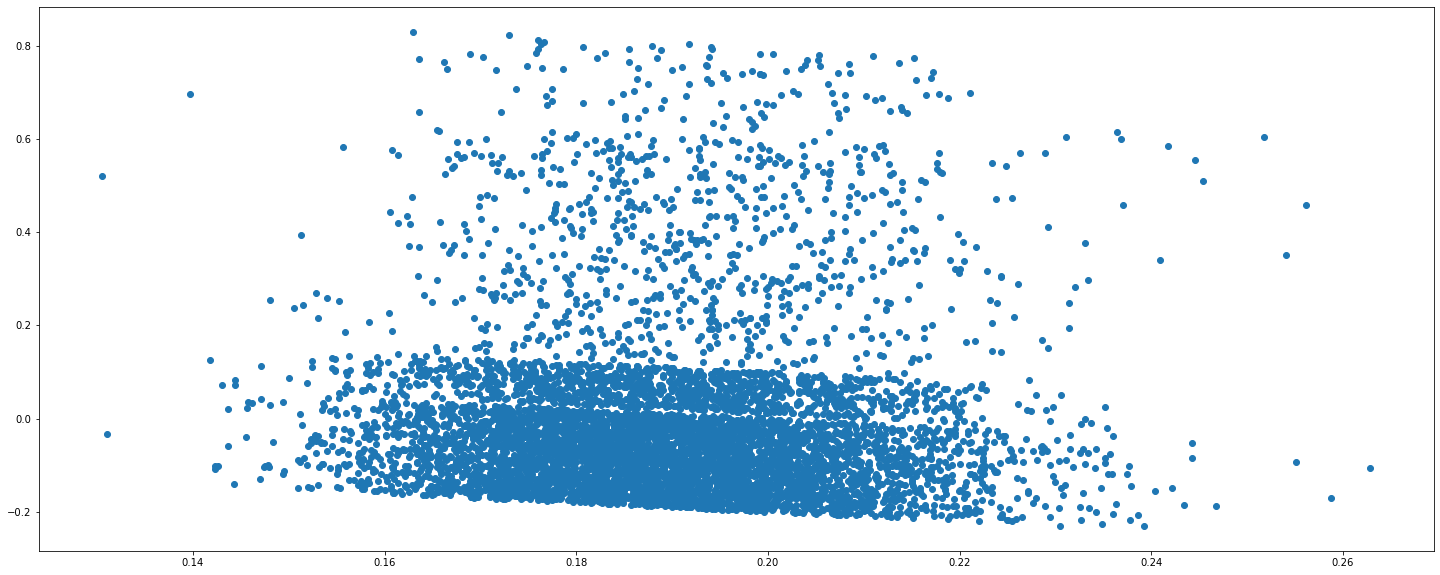

In [534]:
plt.scatter( y_pred, error)

<AxesSubplot:>

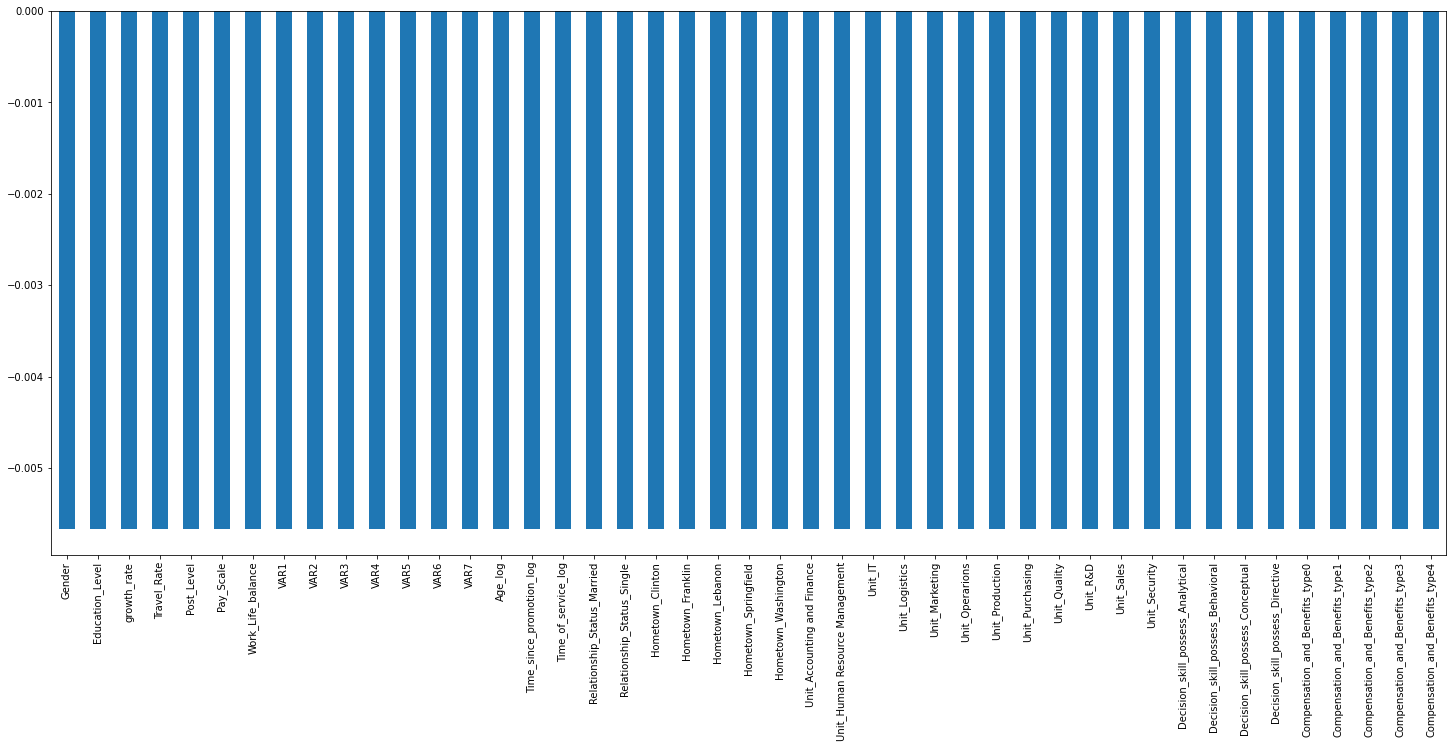

In [507]:
pd.Series(data = lin_model.coef_[0],index=X_train.columns).plot(kind = "bar")

In [405]:
lin_model.predict(X_test)

array([0.19138029, 0.1965678 , 0.18767391, ..., 0.18757213, 0.1723624 ,
       0.187064  ])

In [406]:
mean_squared_error(y_train, y_pred, squared=False)

0.1854001418789075

In [407]:
cross_val_score(lin_model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=10)

array([-0.17707074, -0.18359064, -0.17228569, -0.18684853, -0.19444591,
       -0.17996853, -0.18249599, -0.18286687, -0.20795553, -0.18841916])

In [408]:
score = 100 *max(0,1 - mean_squared_error(y_train, y_pred, squared=False))

In [409]:
score

81.45998581210925

In [540]:
sample = pd.DataFrame

In [572]:
n = 0

In [417]:
def model_eval(model, X_train, y_train, X_test, test_pp, sample, filename):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    sample['Attrition_rate'] = test_pred
    print('Model:', model)
    print('Train RMSE:', mean_squared_error(y_train, train_pred, squared=False))
    print('Score:', 100 * max(0,1 - mean_squared_error(y_train, train_pred, squared=False)))
    sample = pd.concat([test_pp['Employee_ID'], sample['Attrition_rate']], axis=1)
    sample.to_csv(filename, index=False)
    return mean_squared_error(y_train, train_pred, squared=False)

In [418]:
models=[LinearRegression(), Ridge(), Lasso(), LassoCV(), ElasticNet(), KNeighborsRegressor()]

In [419]:
##models=[LinearRegression()]

In [510]:
n = 0
for i in models:
    n+= 1
    print(n)
    path = 'C:\\Users\\mailk\\OneDrive\\Desktop\\AI and ML\\Linear Regression\\Employee Attrition\\Dataset\\results\\'
    filename = path + str(i)[:-2] + str(n) + '.csv'
    model = i
    model_eval(model, X_train, y_train, X_test, test_pp, sample,filename)

1
Model: LinearRegression()
Train RMSE: 0.1850382505865392
Score: 81.49617494134608
2
Model: Ridge()
Train RMSE: 0.18503826028210418
Score: 81.49617397178959
3
Model: Lasso()
Train RMSE: 0.18574000922221678
Score: 81.42599907777833
4
Model: LassoCV()
Train RMSE: 0.1854001418789075
Score: 81.45998581210925
5
Model: ElasticNet()
Train RMSE: 0.18574000922221678
Score: 81.42599907777833
6
Model: KNeighborsRegressor()
Train RMSE: 0.16474838122040186
Score: 83.52516187795982


## Ridge Parameter Tuning

In [513]:
for i in np.arange(0, 5, .1):
    model = Ridge(alpha=i)
    path = 'C:\\Users\\mailk\\OneDrive\\Desktop\\AI and ML\\Linear Regression\\Employee Attrition\\Dataset\\results\\'
    filename = path + 'Ridge' + str(i)  + '.csv'
    model_eval(model, X_train, y_train, X_test,test_pp, sample, filename)

Model: Ridge(alpha=0.0)
Train RMSE: 0.1850851343135262
Score: 81.49148656864737
Model: Ridge(alpha=0.1)
Train RMSE: 0.18503825860180595
Score: 81.4961741398194
Model: Ridge(alpha=0.2)
Train RMSE: 0.18503825865302317
Score: 81.49617413469768
Model: Ridge(alpha=0.30000000000000004)
Train RMSE: 0.18503825873829055
Score: 81.49617412617094
Model: Ridge(alpha=0.4)
Train RMSE: 0.18503825885753084
Score: 81.49617411424693
Model: Ridge(alpha=0.5)
Train RMSE: 0.18503825901066706
Score: 81.4961740989333
Model: Ridge(alpha=0.6000000000000001)
Train RMSE: 0.18503825919762232
Score: 81.49617408023776
Model: Ridge(alpha=0.7000000000000001)
Train RMSE: 0.18503825941832
Score: 81.49617405816801
Model: Ridge(alpha=0.8)
Train RMSE: 0.18503825967268367
Score: 81.49617403273164
Model: Ridge(alpha=0.9)
Train RMSE: 0.18503825996063708
Score: 81.49617400393629
Model: Ridge()
Train RMSE: 0.18503826028210418
Score: 81.49617397178959
Model: Ridge(alpha=1.1)
Train RMSE: 0.18503826063700912
Score: 81.496173936299

## Lasso Parameter Tuning

In [515]:
for i in np.arange(0, 5, .1):
    model = Lasso(alpha=i)
    path = 'C:\\Users\\mailk\\OneDrive\\Desktop\\AI and ML\\Linear Regression\\Employee Attrition\\Dataset\\results\\'
    filename = path + 'Lasso' + str(i)  + '.csv'
    model_eval(model, X_train, y_train, X_test,test_pp, sample, filename)

Model: Lasso(alpha=0.0)
Train RMSE: 0.1850382585847163
Score: 81.49617414152837
Model: Lasso(alpha=0.1)
Train RMSE: 0.18574000922221678
Score: 81.42599907777833
Model: Lasso(alpha=0.2)
Train RMSE: 0.18574000922221678
Score: 81.42599907777833
Model: Lasso(alpha=0.30000000000000004)
Train RMSE: 0.18574000922221678
Score: 81.42599907777833
Model: Lasso(alpha=0.4)
Train RMSE: 0.18574000922221678
Score: 81.42599907777833
Model: Lasso(alpha=0.5)
Train RMSE: 0.18574000922221678
Score: 81.42599907777833
Model: Lasso(alpha=0.6000000000000001)
Train RMSE: 0.18574000922221678
Score: 81.42599907777833
Model: Lasso(alpha=0.7000000000000001)
Train RMSE: 0.18574000922221678
Score: 81.42599907777833
Model: Lasso(alpha=0.8)
Train RMSE: 0.18574000922221678
Score: 81.42599907777833
Model: Lasso(alpha=0.9)
Train RMSE: 0.18574000922221678
Score: 81.42599907777833
Model: Lasso()
Train RMSE: 0.18574000922221678
Score: 81.42599907777833
Model: Lasso(alpha=1.1)
Train RMSE: 0.18574000922221678
Score: 81.4259990

## Lets stretch ElasticNet

In [516]:
for i in np.arange(0, 1.1, .1):
    model = ElasticNet(l1_ratio=i)
    path = 'C:\\Users\\mailk\\OneDrive\\Desktop\\AI and ML\\Linear Regression\\Employee Attrition\\Dataset\\results\\'
    filename = path + 'Elasticnet' + str(i)  + '.csv'
    model_eval(model, X_train, y_train, X_test,test_pp, sample, filename)

Model: ElasticNet(l1_ratio=0.0)
Train RMSE: 0.18539836555459005
Score: 81.460163444541
Model: ElasticNet(l1_ratio=0.1)
Train RMSE: 0.18574000922221678
Score: 81.42599907777833
Model: ElasticNet(l1_ratio=0.2)
Train RMSE: 0.18574000922221678
Score: 81.42599907777833
Model: ElasticNet(l1_ratio=0.30000000000000004)
Train RMSE: 0.18574000922221678
Score: 81.42599907777833
Model: ElasticNet(l1_ratio=0.4)
Train RMSE: 0.18574000922221678
Score: 81.42599907777833
Model: ElasticNet()
Train RMSE: 0.18574000922221678
Score: 81.42599907777833
Model: ElasticNet(l1_ratio=0.6000000000000001)
Train RMSE: 0.18574000922221678
Score: 81.42599907777833
Model: ElasticNet(l1_ratio=0.7000000000000001)
Train RMSE: 0.18574000922221678
Score: 81.42599907777833
Model: ElasticNet(l1_ratio=0.8)
Train RMSE: 0.18574000922221678
Score: 81.42599907777833
Model: ElasticNet(l1_ratio=0.9)
Train RMSE: 0.18574000922221678
Score: 81.42599907777833
Model: ElasticNet(l1_ratio=1.0)
Train RMSE: 0.18574000922221678
Score: 81.4259

## Lets test KNN

In [517]:
res = []
for i in np.arange(1, 15, 1):
    path = 'C:\\Users\\mailk\\OneDrive\\Desktop\\AI and ML\\Linear Regression\\Employee Attrition\\Dataset\\results\\'
    filename = path + 'KNN' + str(i) + '.csv'
    model = KNeighborsRegressor(n_neighbors=i)
    err = model_eval(model, X_train, y_train, X_test,test_pp, sample, filename)
    res.append(err)

Model: KNeighborsRegressor(n_neighbors=1)
Train RMSE: 0.0
Score: 100.0
Model: KNeighborsRegressor(n_neighbors=2)
Train RMSE: 0.12914498362582374
Score: 87.08550163741762
Model: KNeighborsRegressor(n_neighbors=3)
Train RMSE: 0.15071862277999493
Score: 84.92813772200051
Model: KNeighborsRegressor(n_neighbors=4)
Train RMSE: 0.15909487629606653
Score: 84.09051237039334
Model: KNeighborsRegressor()
Train RMSE: 0.16474838122040186
Score: 83.52516187795982
Model: KNeighborsRegressor(n_neighbors=6)
Train RMSE: 0.16789606895693085
Score: 83.21039310430692
Model: KNeighborsRegressor(n_neighbors=7)
Train RMSE: 0.170022208219265
Score: 82.9977791780735
Model: KNeighborsRegressor(n_neighbors=8)
Train RMSE: 0.1724725306203679
Score: 82.75274693796321
Model: KNeighborsRegressor(n_neighbors=9)
Train RMSE: 0.17408023071732218
Score: 82.59197692826778
Model: KNeighborsRegressor(n_neighbors=10)
Train RMSE: 0.17516663228072699
Score: 82.4833367719273
Model: KNeighborsRegressor(n_neighbors=11)
Train RMSE: 

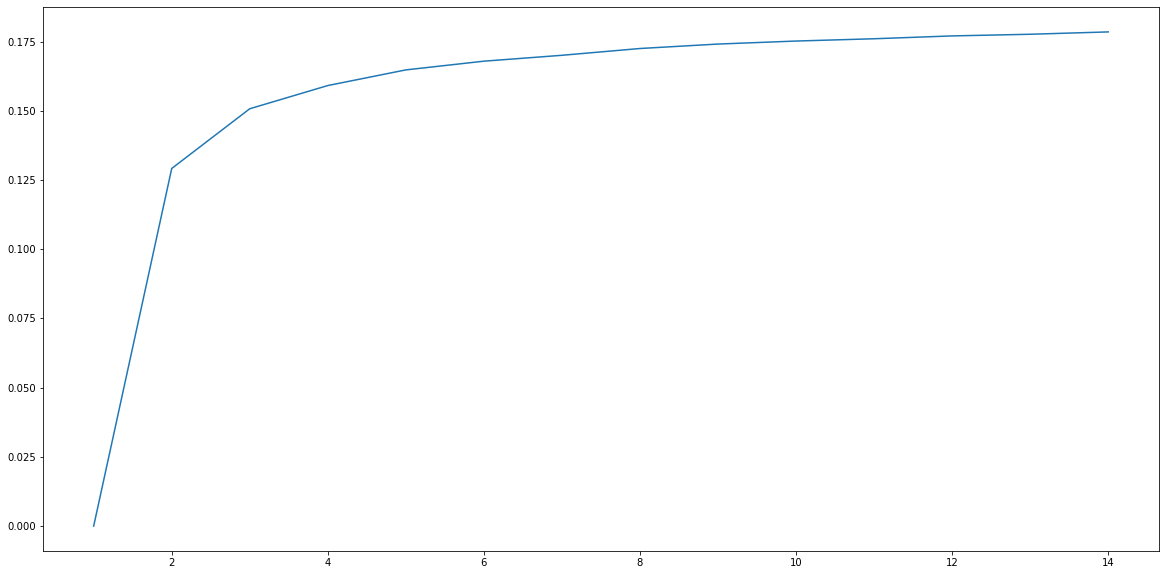

In [423]:
plt.plot(range(1,15),res)